## Category plots to show the budget and popularity of films based on novels

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import json 
import os

sns.set(style="whitegrid")

pd.options.display.max_rows = 10

In [2]:
os.chdir('..')
cwd = os.getcwd()
data_dir = '/data/' #path to the data folder which contains a 'pre-processed' folder within it
plots_dir = "/plots/"#import group functions
import sys
sys.path.insert(0, os.path.abspath(cwd + '/utils/'))
from util import retrieve_category

In [3]:
# Load useful dataframes 
df_ohe_bookcombined = pd.read_pickle(cwd+ data_dir+"pre-processed/movie_encoded_book_summary.pkl")
list(df_ohe_bookcombined)

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'genres',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'production_companies',
 'production_countries',
 'release_date',
 'spoken_languages',
 'movie_id',
 'cast',
 'crew',
 'lead_male',
 'lead_female',
 'lead2_male',
 'lead2_female',
 'genres_name',
 'keywords_name',
 'production_companies_name',
 'production_countries_name',
 'spoken_languages_name',
 'crew_name',
 'cast_name',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 '1960s',
 '1970s',
 '1980s',
 '19th century',
 '3d',
 'adoption',
 'adultery',
 'adventure',
 'aftercreditsstinger',
 'afterlife',
 'agent',
 'airplane',
 'airport',
 'alcohol',
 'alcoholic',
 'alcoholism',
 'alien',
 'alien invasion',
 'american football',
 

In [4]:
# trim dataframe: remove movies which don't have any revenue
df_ohe_bookcombined_trimmed = df_ohe_bookcombined[df_ohe_bookcombined['revenue']!=0]

In [81]:
# plot colours
sns.set_palette('muted', n_colors=5, desat=None, color_codes=False)


# Motivation for the question
## Are more films being released based off books / are sequels?
From 2000 onwards, there has been a gradual increase in the number of films released that are based on books or that are sequels of previous films

In [86]:
#get only the indices of movies which are books
book_inds = df_ohe_bookcombined.index[df_ohe_bookcombined['book']==1]
#get only the indices of movies which are sequels
sequel_inds = df_ohe_bookcombined.index[df_ohe_bookcombined['sequel']==1]
# movies which are not books or sequels
notbook_notsequel_inds = df_ohe_bookcombined.index[(df_ohe_bookcombined['book']==0) & (df_ohe_bookcombined['sequel']==0)]

# and for trimmed data
trim_book_inds = df_ohe_bookcombined_trimmed.index[df_ohe_bookcombined_trimmed['book']==1]
trim_sequel_inds = df_ohe_bookcombined_trimmed.index[df_ohe_bookcombined_trimmed['sequel']==1]
trim_notbook_notsequel_inds = df_ohe_bookcombined_trimmed.index[(df_ohe_bookcombined_trimmed['book']==0) & (df_ohe_bookcombined_trimmed['sequel']==0)]


In [6]:
df_ohe_bookcombined["release_date"] = df_ohe_bookcombined["release_date"].astype("datetime64")

Text(0.5, 0.98, 'Number of films released: Based of books, sequels, other')

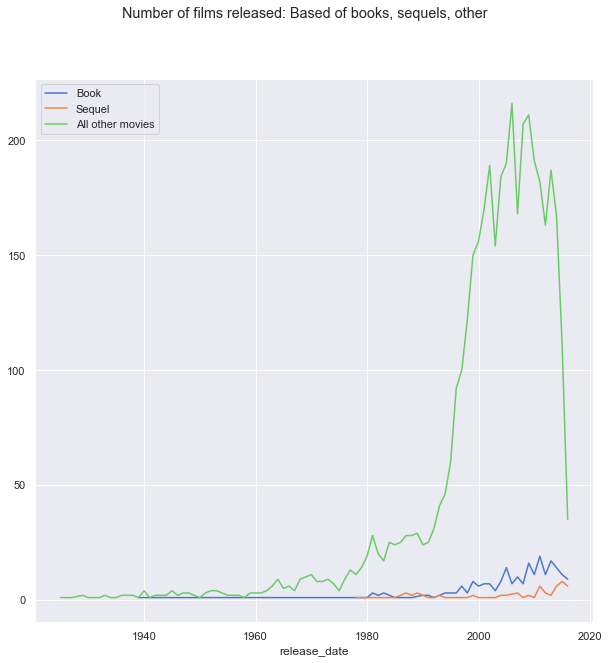

In [87]:
# Figure showing an the increase in movies based off books and sequels
f, (axes) = plt.subplots(1,1, figsize=(10,10))
df_ohe_bookcombined.loc[book_inds]['release_date'].groupby(df_ohe_bookcombined.loc[book_inds]['release_date'].dt.year).count().\
plot(kind='line', ax=axes)

df_ohe_bookcombined.loc[sequel_inds]['release_date'].groupby(df_ohe_bookcombined.loc[sequel_inds]['release_date'].dt.year).count().\
plot(kind='line', ax=axes)

df_ohe_bookcombined.loc[notbook_notsequel_inds]['release_date'].groupby(df_ohe_bookcombined.loc[notbook_notsequel_inds]['release_date'].dt.year).count().\
plot(kind='line', ax=axes)
axes.legend(["Films based on books", "Sequel", "All other movies"]);
f.suptitle('Number of films released: Based of books, sequels, other')
#

Tailing off of values for all these different movie categories - presumably due to data being collected mid-year leading to a sudden big drop? Investigate...

## Do films based off books or sequels earn as much revenue as other films?

Although there are much fewer movies classified as based off a book or sequels, they definitely include movies which can earn as much as all other films.



In [141]:
# scale revenue for interpretability
scalefactor = 1000000
revenue_scaled = df_ohe_bookcombined_trimmed['revenue']/scalefactor

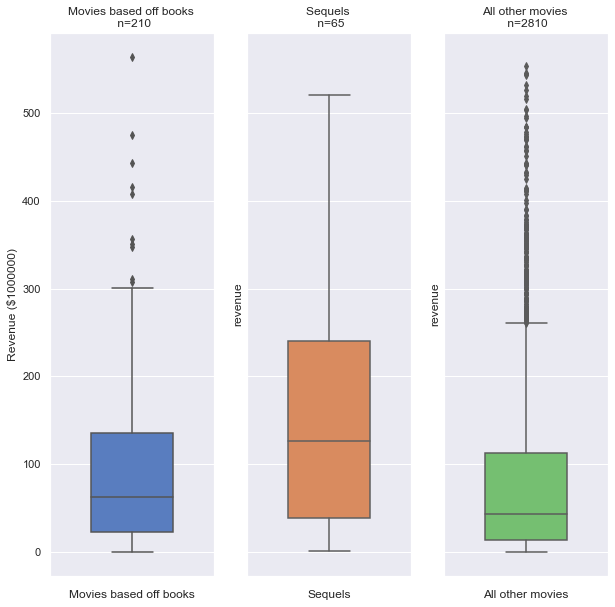

In [150]:
# what about the revenue distributions of these different groups...
#NB trimmed data
f, (axes) = plt.subplots(1,3, figsize=(10,10), sharey=True)
sns.boxplot(y=revenue_scaled.loc[trim_book_inds],
                 width=0.5,
                 color=sns.color_palette()[0],ax=axes[0])
sns.boxplot( y = revenue_scaled.loc[trim_sequel_inds],
                 width=0.5,
                 color=sns.color_palette()[1],ax=axes[1])
sns.boxplot( y=revenue_scaled.loc[trim_notbook_notsequel_inds],
                 width=0.5,
                 color=sns.color_palette()[2], ax=axes[2])
axes[0].set_ylabel('Revenue ($%d)' % (scalefactor))

axes[0].set_xlabel('Movies based off books')
axes[1].set_xlabel('Sequels')
axes[2].set_xlabel('All other movies')

axes[0].set_title('Movies based off books \n n=%d' % (len(trim_book_inds)))
axes[1].set_title('Sequels \n n=%d' % (len(trim_sequel_inds)))
axes[2].set_title('All other movies \n n=%d' % (len(trim_notbook_notsequel_inds)))
plt.savefig(cwd+plots_dir+"categoryplots_revenue-boxplot_books-sequels-other.png")

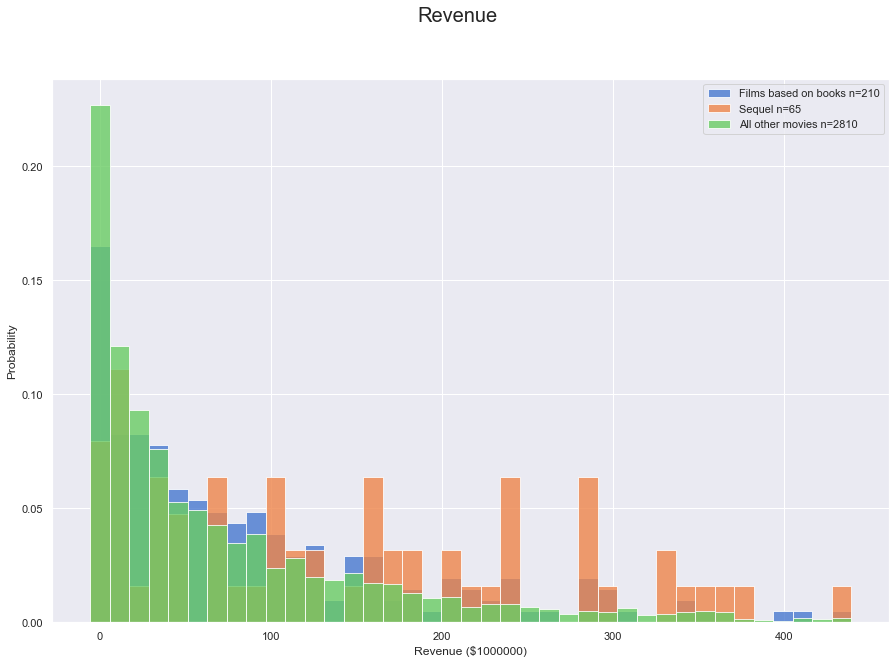

In [151]:
#Histograms for choice...
quantz = [0.01, 0.99]
numbins = 40
alphaval=0.8
bedges = revenue_scaled.quantile([quantz[0], quantz[1]])
bedges = np.linspace(bedges[quantz[0]],bedges[quantz[1]],numbins)

f, (axes) = plt.subplots(1,1, figsize=(15,10))
hist, bins = np.histogram(revenue_scaled.loc[trim_book_inds],
                         bins=bedges)
axes.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]),
        alpha=alphaval)

hist, bins = np.histogram(revenue_scaled.loc[trim_sequel_inds], 
                          bins=bedges)
axes.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]),
        alpha=alphaval)

hist, bins = np.histogram(revenue_scaled.loc[trim_notbook_notsequel_inds],
                         bins=bedges)
axes.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]),
        alpha=alphaval)
axes.set_xlabel('Revenue ($%d)' % (scalefactor))
axes.set_ylabel('Probability')
f.suptitle('%s' % ('Revenue'), fontsize=20)
axes.legend(["Films based on books n=%d" % (len(trim_book_inds)), 
            "Sequel n=%d" % (len(trim_sequel_inds)),
            "All other movies n=%d" % (len(trim_notbook_notsequel_inds))]);
plt.savefig(cwd+plots_dir+"categoryplots_revenue-normhist_books-sequels-other.png")

In [8]:
len(book_inds)

234

### Graveyard below...


In [4]:
# We are interested in profit as measure of success: Calculated as revenue-budget
# Remove movies which have no budget
movie_details_neat = pd.read_pickle(cwd + data_dir + 'pre-processed/movie_details_neat.pkl')
# when other commits are in change this to use trimmed dataframe
movie_details_neat_trimmed = movie_details_neat[movie_details_neat['budget'] !=0]

#calculate profit
movie_details_neat_trimmed['profit'] = movie_details_neat_trimmed['revenue'] - movie_details_neat_trimmed['budget']

<ipython-input-4-9d3e9d5acc49>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_details_neat_trimmed['profit'] = movie_details_neat_trimmed['revenue'] - movie_details_neat_trimmed['budget']


In [5]:
# preliminary stuff to find out effects of removing revenue= 0 or budget =0
test1 = movie_details_neat['revenue']==0
test2 = movie_details_neat['budget'] == 0
print(test1.value_counts())
print(test2.value_counts())
print((test1 & test2).value_counts())

False    3074
True     1252
Name: revenue, dtype: int64
False    3420
True      906
Name: budget, dtype: int64
False    3563
True      763
dtype: int64


In [46]:
# And how many budget=0 or revenue=0 are overlapping...
(test1 & test2).value_counts()

False    3563
True      763
dtype: int64

In [3]:
#getting maps for the keywords 'books based on a novel'
with open(cwd + data_dir + 'pre-processed/id_maps.json', 'r') as f:
    id_maps = json.load(f)

def retrieve_category(df, column_name, ids, id_key_name, result_file_name='', id_maps=None):
    result = df[df.apply(lambda row: False if id_key_name not in row[column_name].keys() else (ids in (row[column_name][id_key_name])), axis=1)]
    if not result_file_name:
        if id_maps:
            result_file_name = column_name + '_' + id_maps[column_name][str(ids)]
        else:
            result_file_name = column_name + '_' + str(ids)
    #result.to_pickle(cwd + data_dir + 'pre-processed/' + result_file_name + '.pkl')
    return result

def check_category(id_maps, column_name):
    print(json.dumps(id_maps[column_name], indent=4))


{
    "18": "Drama",
    "10749": "Romance",
    "12": "Adventure",
    "14": "Fantasy",
    "28": "Action",
    "35": "Comedy",
    "80": "Crime",
    "53": "Thriller",
    "878": "Science Fiction",
    "27": "Horror",
    "9648": "Mystery",
    "10751": "Family",
    "16": "Animation",
    "10752": "War",
    "36": "History",
    "37": "Western",
    "10402": "Music",
    "99": "Documentary",
    "10769": "Foreign",
    "10770": "TV Movie"
}


In [4]:
#find the keywords that would allow us to pick out movies based off books (for example)
def idmap_searcher(id_map_key, kws):
    idz = []
    for query_string in kws:
        for id in id_maps[id_map_key]:
            if id_maps[id_map_key][id].find(query_string) != -1:
                idz.append(id)
                print(id_maps['keywords'][id], id)

In [5]:
# what keywords contain novel?
idmap_searcher('keywords', ['novel'])


based on novel 818
based on graphic novel 18712
based on young adult novel 223438
novelist 155251
stolen novel 180405
plagiarized novel 180412
crime novelist 185767


From the above cell it appears that important keywords to identify movies based off books are: 818, 18712, 223438.
We will keep track of this for producing the following plots:

In [18]:
#dictionary with format: Key = id_map/column name being used to categorise movies
collect_these = {'keywords': [818, 18712, 223438]}

In [6]:
plots_dir = "/plots/"

### Plot comparing budget and popularity of films based off books. 
The plot below shows that we significantly reduce the sample size of the data when we only consider films adapted from books. For films based on a novel, the average popularity score is low (28/100) but with a high standard deviation. Young adult novels which inspire movies seem to be more popular, with an average of 36/100. 

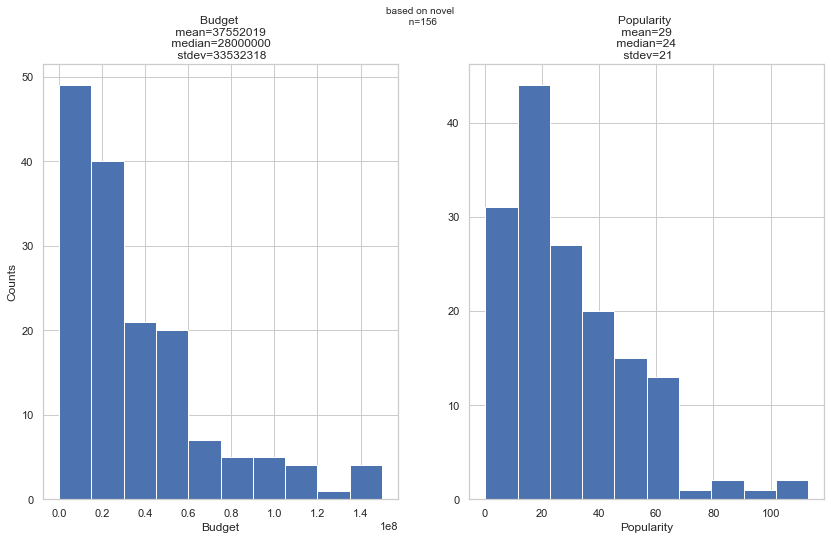

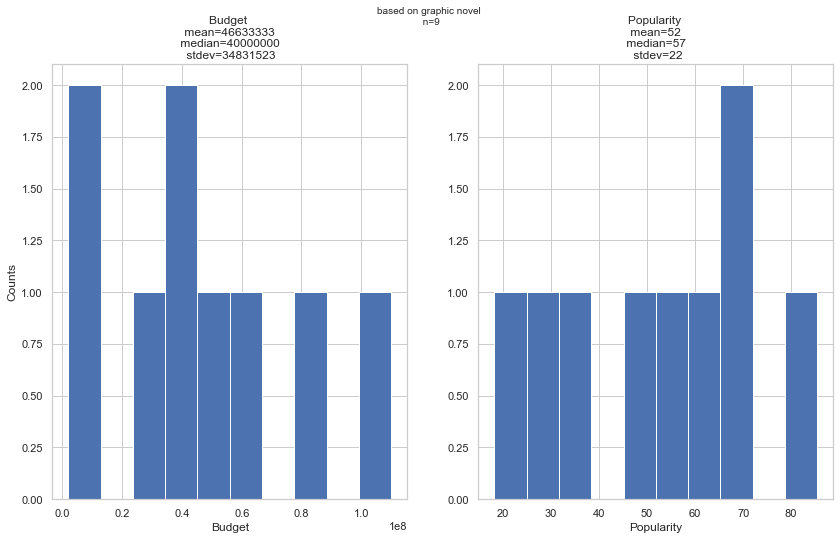

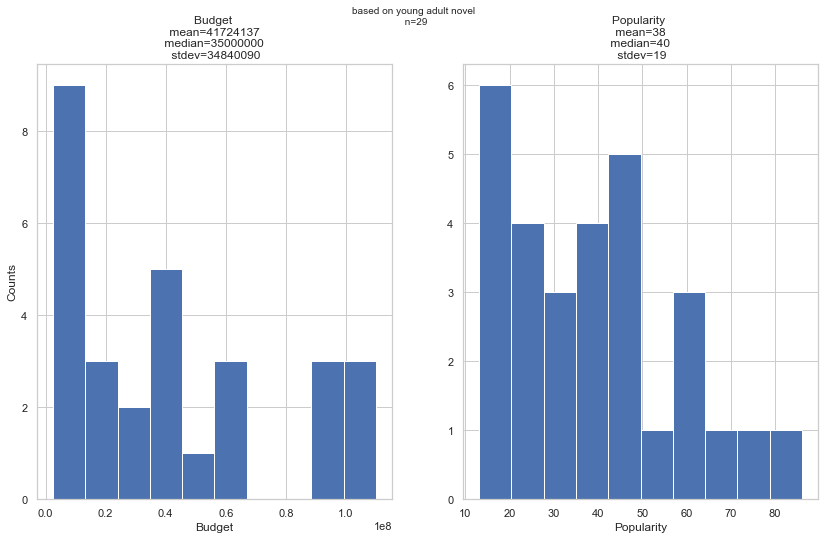

In [16]:
# To start: plots of revenue and popularity for each keyword
for collect_type in collect_these.keys():
    for x in collect_these[collect_type]:
        thisgenre_df = retrieve_category(movie_details_neat_trimmed, collect_type, x, 'id', '', id_maps)
    
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
        ax1 = thisgenre_df['budget'].hist(ax=ax1)
        ax1.set_title('Budget \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['budget'].mean(), thisgenre_df['budget'].median(), thisgenre_df['budget'].std()))
        ax1.set_ylabel('Counts')
        ax1.set_xlabel('Budget')

        
        ax2 = thisgenre_df['popularity'].hist(ax=ax2)
        ax2.set_title('Popularity \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['popularity'].mean(), thisgenre_df['popularity'].median(), thisgenre_df['popularity'].std()))
        ax2.set_xlabel('Popularity')
        
        f.suptitle('%s \n n=%d' % (id_maps[collect_type][str(x)], len(thisgenre_df)), fontsize=10)
        plt.savefig(cwd+plots_dir+"category_plots_for_novel_budget_popularity.png")
    #hist, bins = np.histogram(thisgenre_df['popularity'])
    #ax1.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')
    #ax1.set_ylabel('Probability')
    #ax1.set_title('%s \n' % (id_maps['genres'][genre]))

    


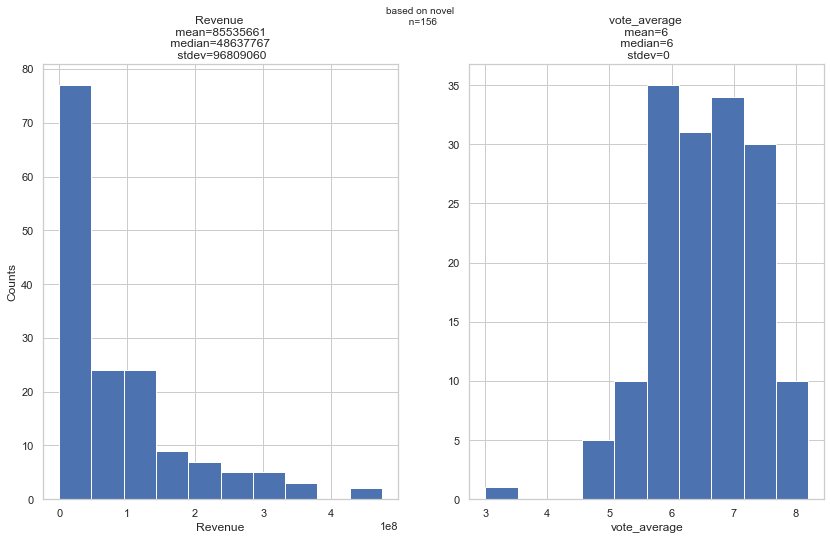

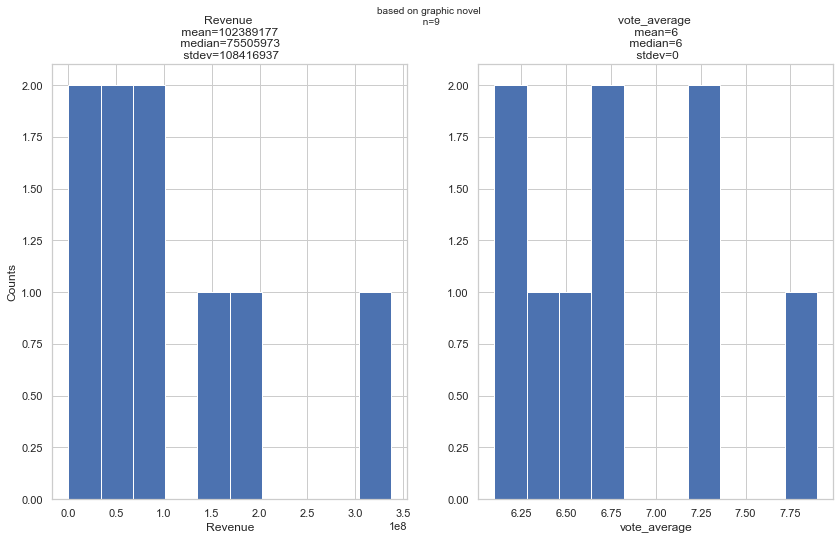

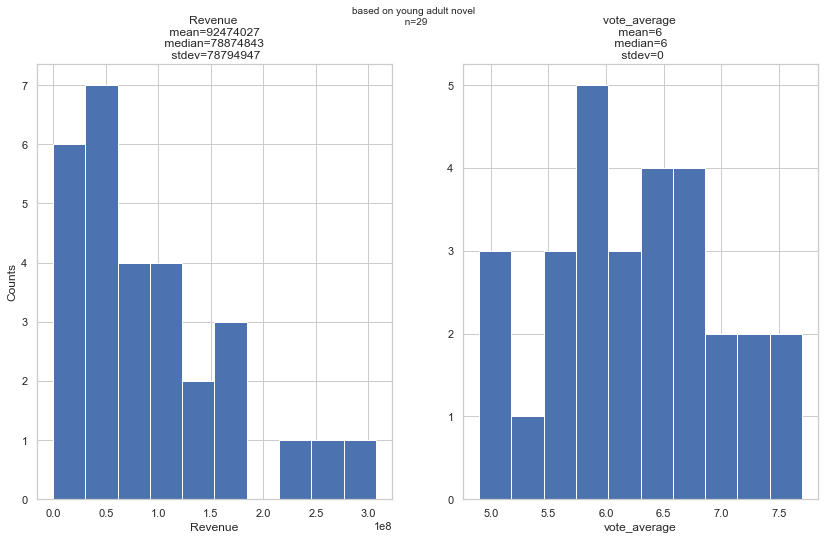

In [17]:
# Additional plots of revenue and vote_average
collect_these = {'keywords': [818, 18712, 223438]}
for collect_type in collect_these.keys():
    for x in collect_these[collect_type]:
        thisgenre_df = retrieve_category(movie_details_neat_trimmed, collect_type, x, 'id', '', id_maps)
    
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))
        ax1 = thisgenre_df['revenue'].hist(ax=ax1)
        ax1.set_title('Revenue \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['revenue'].mean(), thisgenre_df['revenue'].median(), thisgenre_df['revenue'].std()))
        ax1.set_ylabel('Counts')
        ax1.set_xlabel('Revenue')

        
        ax2 = thisgenre_df['vote_average'].hist(ax=ax2)
        ax2.set_title('vote_average \n mean=%d \n median=%d \n stdev=%d' % (thisgenre_df['vote_average'].mean(), thisgenre_df['vote_average'].median(), thisgenre_df['vote_average'].std()))
        ax2.set_xlabel('vote_average')
        
        f.suptitle('%s \n n=%d' % (id_maps[collect_type][str(x)], len(thisgenre_df)), fontsize=10)
        plt.savefig(cwd+plots_dir+"category_plots_for_novel_revenue_vote_average.png")
    #hist, bins = np.histogram(thisgenre_df['popularity'])
    #ax1.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]), color='grey')
    #ax1.set_ylabel('Probability')
    #ax1.set_title('%s \n' % (id_maps['genres'][genre]))

    


In [109]:
#Summary plot with box and whiskers...
for collect_type in collect_these.keys():
    collected_df = pd.DataFrame() # onc column for id relating to genre/category
    collected_df2 = pd.DataFrame()
    for x in collect_these[collect_type]:
        thisgenre_df = retrieve_category(movie_details_neat_trimmed, collect_type, x, 'id', '', id_maps)
        #id_df = pd.Series([str(x)]*len(thisgenre_df))
        thisgenre_df['id'] = id_maps[collect_type][str(x)]
        collected_df = collected_df.append(thisgenre_df[['profit', 'budget', 'revenue', 'id', 'vote_average']])

        

        #this gives a warning so there is probably some unsavoury pandas forcing going on

<ipython-input-109-e293f03794f5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisgenre_df['id'] = id_maps[collect_type][str(x)]


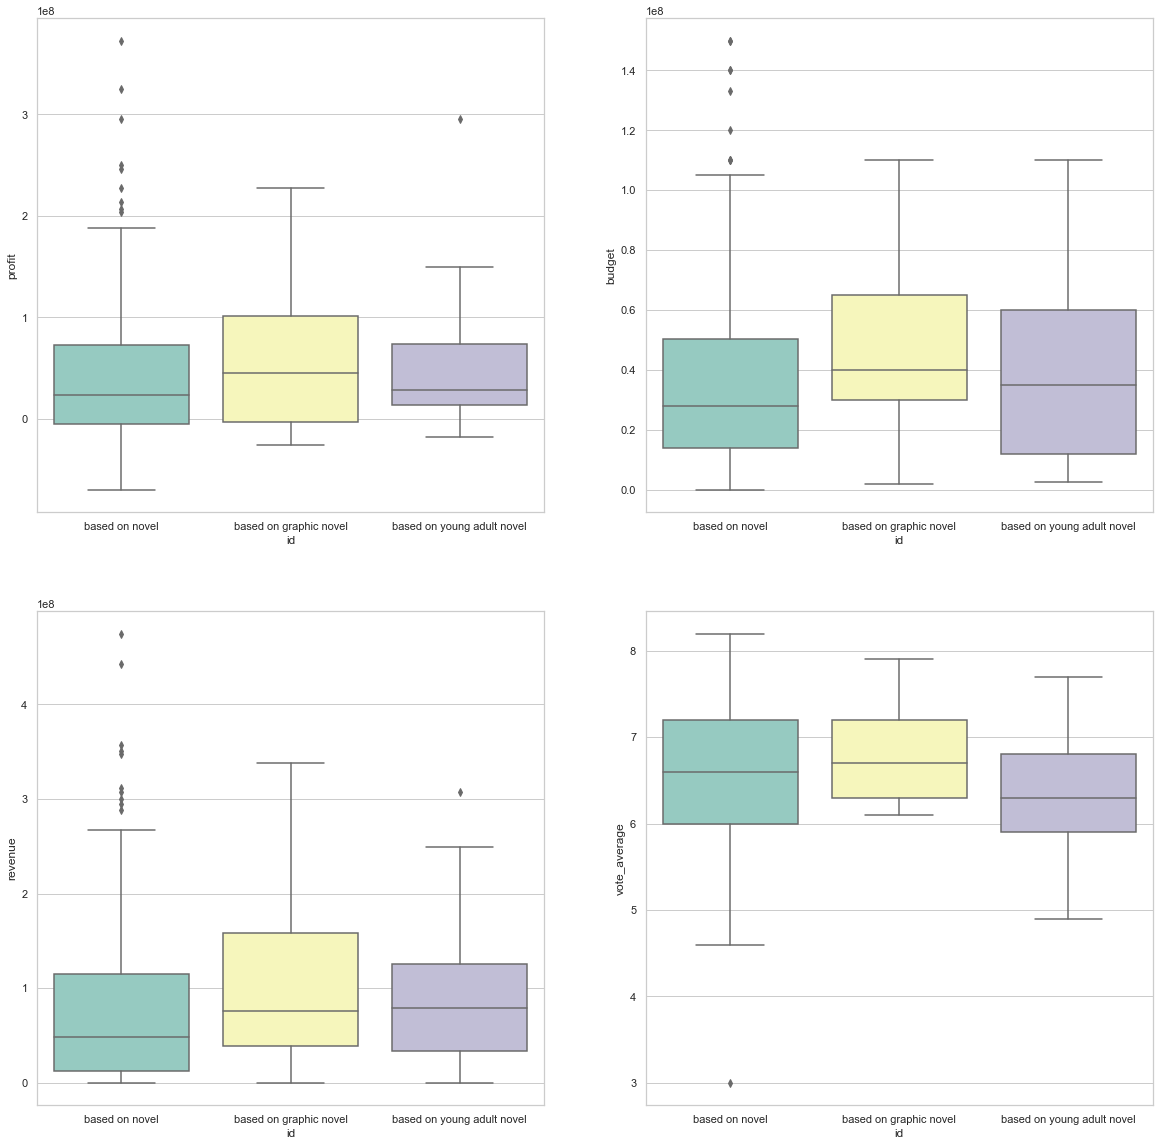

In [132]:
f, ([axis1, axis2],[axis3, axis4]) = plt.subplots(2,2, figsize=(20,20))
sns.boxplot(x="id", y="profit",
                 data=collected_df, palette="Set3", ax=axis1)
sns.boxplot(x="id", y="budget",
                 data=collected_df, palette="Set3", ax=axis2)
sns.boxplot(x="id", y="revenue",
                 data=collected_df, palette="Set3", ax=axis3)
sns.boxplot(x="id", y="vote_average",
                 data=collected_df, palette="Set3", ax=axis4)

### Compare the above distributions against all other film types...


In [ ]:
#start working here!! QQQ

### Compare profits of films based off of books


In [7]:
list(movie_details_neat)

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'genres',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'production_companies',
 'production_countries',
 'release_date',
 'spoken_languages',
 'movie_id',
 'cast',
 'crew']

0       105000000
1       150000000
2       140000000
3       145000000
4        27000000
          ...    
4313        12000
4316        20000
4319         7000
4321       220000
4322         9000
Name: budget, Length: 3420, dtype: int64

In [10]:
movie_details_neat['budget']

0       105000000
1       150000000
2       140000000
3       145000000
4        27000000
          ...    
4321       220000
4322         9000
4323            0
4324            0
4325            0
Name: budget, Length: 4326, dtype: int64

### Summary plots for revenue etc. NB trimmed data (i.e. has a starting budget)
Write stuff here!